## Import

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
sns.set()

In [4]:
df = pd.read_csv('wyd_88_05_for_release.csv')

## Explore

All the countries for which we have data:

In [5]:
df['contcod'].unique()

array(['AGO', 'ALB', 'ANT', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE',
       'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGD-R', 'BGD-U', 'BGR', 'BIH',
       'BLR', 'BOL', 'BRA', 'BRB', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE',
       'CHL', 'CHN', 'CHN-R', 'CHN-U', 'CIV', 'CMR', 'COG', 'COL', 'COM',
       'CPV', 'CRI', 'CYP', 'CZE', 'DDR', 'DEU', 'DJI', 'DNK', 'DOM',
       'DZA', 'ECU', 'ECU-U', 'EGY', 'EGY-R', 'EGY-U', 'ESP', 'EST',
       'ETH', 'FIN', 'FRA', 'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GMB',
       'GNB', 'GRC', 'GTM', 'GUY', 'HKG', 'HND', 'HRV', 'HTI', 'HUN',
       'IDN', 'IDN-R', 'IDN-U', 'IND', 'IND-R', 'IND-U', 'IRL', 'IRN',
       'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM',
       'KOR', 'LAO', 'LBR', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAR',
       'MDA', 'MDG', 'MEX', 'MKD', 'MLI', 'MNE', 'MNG', 'MNG-R', 'MNG-U',
       'MOZ', 'MRT', 'MWI', 'MYS', 'NAM', 'NER', 'NER-R', 'NER-U', 'NGA',
       'NIC', 'NLD', 'NOR', 'NPL', 'NZL', 'PAK', 'PAN', 'PER', 'PER-U',
  

All the countries that have 2005 data:

In [6]:
df.loc[df['year'] == 2005]['contcod'].unique()

array(['AGO', 'ALB', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BEL', 'BGD',
       'BGR', 'BIH', 'BLR', 'BOL', 'BRA', 'BTN', 'CAF', 'CAN', 'CHE',
       'CHL', 'CHN', 'CHN-R', 'CHN-U', 'CIV', 'COG', 'COL', 'COM', 'CPV',
       'CRI', 'CZE', 'DEU', 'DJI', 'DNK', 'DOM', 'ECU', 'EGY', 'ESP',
       'EST', 'ETH', 'FIN', 'FRA', 'GAB', 'GBR', 'GEO', 'GHA', 'GIN',
       'GMB', 'GNB', 'GRC', 'GTM', 'HND', 'HRV', 'HUN', 'IDN', 'IDN-R',
       'IDN-U', 'IND', 'IND-R', 'IND-U', 'IRL', 'IRN', 'ISR', 'ITA',
       'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KOR', 'LAO', 'LBR',
       'LSO', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MKD',
       'MLI', 'MNE', 'MNG', 'MOZ', 'MWI', 'MYS', 'NER', 'NGA', 'NIC',
       'NLD', 'NOR', 'NPL', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT',
       'PRY', 'ROM', 'RUS', 'SEN', 'SLE', 'SLV', 'SRB', 'SVK', 'SVN',
       'SWE', 'TCD', 'TGO', 'THA', 'TJK', 'TKM', 'TUN', 'TUR', 'TWN',
       'UGA', 'UKR', 'URY', 'USA', 'VEN', 'VNM', 'YEM', 'ZAR', 'ZMB'],
      dtype=ob

In [7]:
df.head(3)

,contcod,country,year,region,Dexpend,whole,group,Dinc,pop
0,AGO,6,1998,1,1,1,1,45.023155,1.24
1,AGO,6,1998,1,1,1,2,74.135872,1.24
2,AGO,6,1998,1,1,1,3,96.224304,1.24


In [8]:
usa = df.loc[df['contcod'] == 'USA']

In [9]:
usa['year'].unique()

array([1988, 1993, 1998, 2002, 2005])

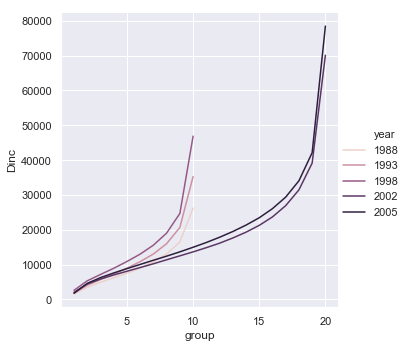

In [10]:
sns.relplot(x="group", y="Dinc", kind="line", hue="year", legend="full", data=usa);

In [11]:
countries = ['USA', 'BRA', 'IND', 'CHN']

In [12]:
several = df.loc[df['contcod'].isin(countries)]

In [13]:
only2005 = several.loc[several['year'] == 2005]

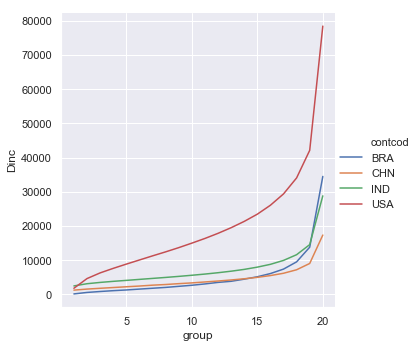

In [14]:
sns.relplot(x="group", y="Dinc", kind="line", hue="contcod", legend="full", data=only2005);

# Archive

In [16]:
ago = df.loc[(df['country'] == '6')]

In [17]:
ago1 = df.loc[(df['country'] == '6') & (df['year'] == 1998)]

In [18]:
ago2 = df.loc[(df['country'] == '6') & (df['year'] == 2005)]

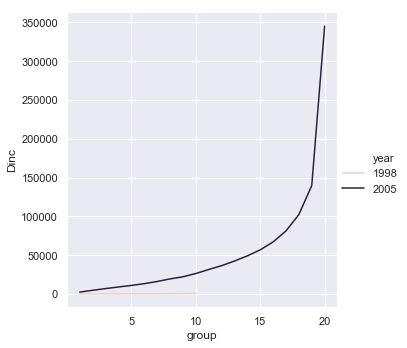

In [19]:
sns.relplot(x="group", y="Dinc", kind="line", hue="year", legend="full", data=ago);

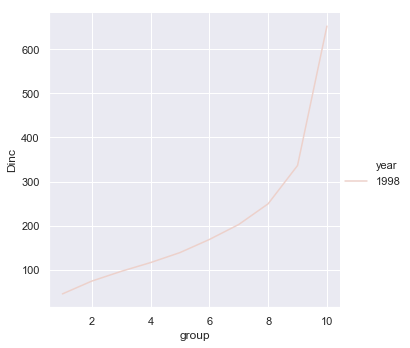

In [20]:
sns.relplot(x="group", y="Dinc", kind="line", hue="year", legend="full", data=ago1);

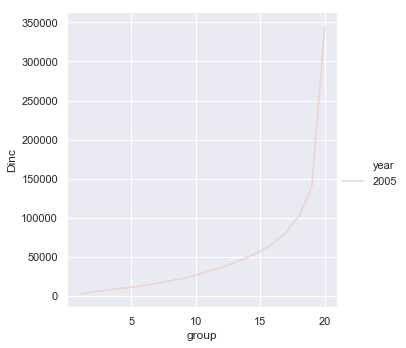

In [21]:
sns.relplot(x="group", y="Dinc", kind="line", hue="year", legend="full", data=ago2);